# Metyis: Desafío Ingeniero de Datos

Rafael Fernández Ovejero

## Obligatorios

In [1]:
# Se importan las liberías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Histograma de tiempos de viaje para un año dado

In [2]:
# Elegimos el año 2017 por ejemplo (tenemos datos de 2014 a 2017)
year = 2017

In [8]:
# Se leen los ficheros csv de viajas y estaciones del año correspondiente
df_trips = pd.read_csv(f'./data/OD_{year}.csv')
df_stations = pd.read_csv(f'./data/Stations_{year}.csv', index_col=0)

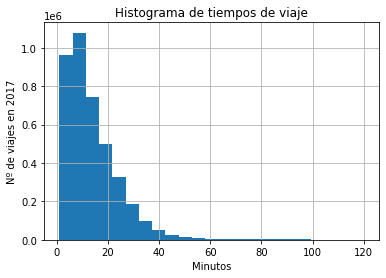

In [9]:
# Se convierte la duración de los viajes a minutos (viene en segundos)
df_trips['duration_min'] = df_trips['duration_sec'] / 60

# Se genera el histograma de los tiempos de viaje
plt.hist(df_trips['duration_min'], bins=23)

plt.xlabel('Minutos')
plt.ylabel(f'Nº de viajes en {year}')
plt.title('Histograma de tiempos de viaje')
plt.grid(True)
plt.show()

### Listado del Top N de estaciones más utilizadas para un año dado

In [12]:
# Para los cálculos Top, tomaremos N = 10
N = 10

#### - Estaciones de salida

In [15]:
# Se agrupan los datos por el código de estación de salida para contar los viajes por estación
# El resultado está en orden descendente y se toman los N primeros
grouped_start = pd.Index(df_trips['start_station_code']).value_counts().head(N)
columns = {'station_code': grouped_start.index, 'count': grouped_start}
start_topN = pd.DataFrame(columns)

# Se unen con los datos de estaciones para obtener el nombre y la posición
start_topN_names = pd.merge(left = start_topN, right = df_stations, left_on = 'station_code', right_on = 'code')
start_topN_names

,station_code,count,name,latitude,longitude,is_public
0,6100,47851,Mackay /de Maisonneuve (Sud),45.496590,-73.578510,1
1,6078,35479,Métro Place-des-Arts (de Maisonneuve / de Bleury),45.507080,-73.569170,1
2,6184,34700,Métro Mont-Royal (Rivard / du Mont-Royal),45.524673,-73.582550,1
3,6015,34688,Berri / de Maisonneuve,45.515299,-73.561273,1
4,6064,32198,Métro Peel (de Maisonneuve / Stanley),45.500380,-73.575070,1
5,6136,31173,Métro Laurier (Rivard / Laurier),45.527616,-73.589115,1
6,6221,31072,du Mont-Royal / Clark,45.519410,-73.586850,1
7,6214,27776,Square St-Louis,45.517350,-73.569060,1
8,6012,26785,Métro St-Laurent (de Maisonneuve / St-Laurent),45.510660,-73.564970,1
9,6406,26364,Marché Atwater,45.480208,-73.577599,1


#### - Estaciones de llegada

In [16]:
# Se agrupan los datos por el código de estación de llegada para contar los viajes por estación
# El resultado está en orden descendente y se toman los N primeros
grouped_end = pd.Index(df_trips['end_station_code']).value_counts().head(N)
columns = {'station_code': grouped_end.index, 'count': grouped_end}
end_topN = pd.DataFrame(columns)

# Se unen con los datos de estaciones para obtener el nombre y la posición
end_topN_names = pd.merge(left = end_topN, right = df_stations, left_on = 'station_code', right_on = 'code')
end_topN_names

,station_code,count,name,latitude,longitude,is_public
0,6015,51481,Berri / de Maisonneuve,45.515299,-73.561273,1
1,6100,47052,Mackay /de Maisonneuve (Sud),45.496590,-73.578510,1
2,6012,41361,Métro St-Laurent (de Maisonneuve / St-Laurent),45.510660,-73.564970,1
3,6078,40884,Métro Place-des-Arts (de Maisonneuve / de Bleury),45.507080,-73.569170,1
4,6026,36677,de la Commune / Place Jacques-Cartier,45.507629,-73.551876,1
5,6406,32772,Marché Atwater,45.480208,-73.577599,1
6,6064,32481,Métro Peel (de Maisonneuve / Stanley),45.500380,-73.575070,1
7,6184,31635,Métro Mont-Royal (Rivard / du Mont-Royal),45.524673,-73.582550,1
8,6052,31544,de la Commune / King,45.498030,-73.552665,1
9,6036,28859,de la Commune / St-Sulpice,45.504245,-73.553545,1


#### - En general

In [17]:
# Se concatenan los códigos de las estaciones de salida con los de llegada para luego agruparlos
stations = pd.concat([df_trips['start_station_code'], df_trips['end_station_code']], ignore_index=True)

# Se agrupan los datos por el código de estación para contar los viajes por estación
# El resultado está en orden descendente y se toman los N primeros
grouped_both = pd.Index(stations).value_counts().head(N)
columns = {'station_code': grouped_both.index, 'count': grouped_both}
both_topN = pd.DataFrame(columns)

# Se unen con los datos de estaciones para obtener el nombre y la posición
both_topN_names = pd.merge(left = both_topN, right = df_stations, left_on = 'station_code', right_on = 'code')
both_topN_names

,station_code,count,name,latitude,longitude,is_public
0,6100,94903,Mackay /de Maisonneuve (Sud),45.496590,-73.578510,1
1,6015,86169,Berri / de Maisonneuve,45.515299,-73.561273,1
2,6078,76363,Métro Place-des-Arts (de Maisonneuve / de Bleury),45.507080,-73.569170,1
3,6012,68146,Métro St-Laurent (de Maisonneuve / St-Laurent),45.510660,-73.564970,1
4,6184,66335,Métro Mont-Royal (Rivard / du Mont-Royal),45.524673,-73.582550,1
5,6064,64679,Métro Peel (de Maisonneuve / Stanley),45.500380,-73.575070,1
6,6026,61812,de la Commune / Place Jacques-Cartier,45.507629,-73.551876,1
7,6406,59136,Marché Atwater,45.480208,-73.577599,1
8,6221,56446,du Mont-Royal / Clark,45.519410,-73.586850,1
9,6052,55024,de la Commune / King,45.498030,-73.552665,1


### Listado del Top N de viajes más comunes para un año dado. Donde un viaje se define por su estación de salida y de llegada

In [18]:
# Se agrupan los datos por el código de estación de salida y de llegada para contar los viajes por estación
# Se ordena el resultado en orden descendente y se toman los N primeros
grouped_trip = df_trips.groupby(['start_station_code','end_station_code'])['start_date'].count().sort_values(ascending=False).head(N)
columns = {'start_code': grouped_trip.index.get_level_values(0), 
           'end_code': grouped_trip.index.get_level_values(1), 
           'count': grouped_trip }
trips_topN = pd.DataFrame(columns, index=None)

# Se unen con los datos de estaciones para obtener el nombre y la posición de la estación de salida y de llegada
trips_topN_names = pd.merge(left = trips_topN, right = df_stations, left_on = 'start_code', right_on = 'code')
trips_topN_names = pd.merge(left = trips_topN_names, right = df_stations, left_on = 'end_code', right_on = 'code')
trips_topN_names

,start_code,end_code,count,name_x,latitude_x,longitude_x,is_public_x,name_y,latitude_y,longitude_y,is_public_y
0,6501,6501,2897,Métro Jean-Drapeau,45.513409,-73.533554,1,Métro Jean-Drapeau,45.513409,-73.533554,1
1,6026,6026,2450,de la Commune / Place Jacques-Cartier,45.507629,-73.551876,1,de la Commune / Place Jacques-Cartier,45.507629,-73.551876,1
2,6052,6026,1773,de la Commune / King,45.498030,-73.552665,1,de la Commune / Place Jacques-Cartier,45.507629,-73.551876,1
3,6050,6406,2149,de la Commune / McGill,45.498673,-73.552563,1,Marché Atwater,45.480208,-73.577599,1
4,6036,6406,1719,de la Commune / St-Sulpice,45.504245,-73.553545,1,Marché Atwater,45.480208,-73.577599,1
5,6052,6406,1820,de la Commune / King,45.498030,-73.552665,1,Marché Atwater,45.480208,-73.577599,1
6,6406,6052,2144,Marché Atwater,45.480208,-73.577599,1,de la Commune / King,45.498030,-73.552665,1
7,6036,6036,1951,de la Commune / St-Sulpice,45.504245,-73.553545,1,de la Commune / St-Sulpice,45.504245,-73.553545,1
8,6136,6163,1813,Métro Laurier (Rivard / Laurier),45.527616,-73.589115,1,Marquette / Laurier,45.535430,-73.582200,1
9,6078,6100,1567,Métro Place-des-Arts (de Maisonneuve / de Bleury),45.507080,-73.569170,1,Mackay /de Maisonneuve (Sud),45.496590,-73.578510,1


### Identificación de horas punta para un año determinado sin tener en cuenta el día

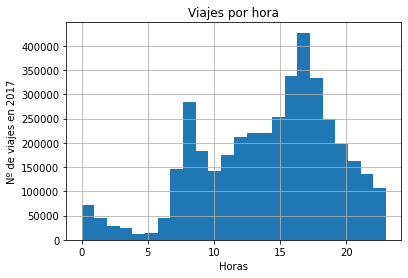

In [19]:
hour = pd.to_datetime(df_trips['start_date']).dt.hour
plt.hist(hour, bins=24)

plt.xlabel('Horas')
plt.ylabel(f'Nº de viajes en {year}')
plt.title('Viajes por hora')
plt.grid(True)
plt.show()

* Se observa que las 17 horas es la hora con mayor número de viajes

In [20]:
# Horas con mayor número de viajes
hour.value_counts().head(5)

17    426821
16    337971
18    332641
8     283240
15    253473
Name: start_date, dtype: int64

## Deseables

### Comparación de utilización del sistema entre dos años cualesquiera

In [21]:
# Elegimos el año 2016 por ejemplo, para comparar  (tenemos datos de 2014 a 2017)
year2 = 2016

In [22]:
# Se leen los ficheros csv de viajas y estaciones del año correspondiente
df_trips2 = pd.read_csv(f'./data/OD_{year2}.csv')
df_stations2 = pd.read_csv(f'./data/Stations_{year2}.csv', index_col=None, header=0)

# Se calcula también la duración de los viajes en minutos (viene en segundos)
df_trips2['duration_min'] = df_trips2['duration_sec'] / 60

#### Cantidad de viajes totales

In [23]:
# Se cuenta el número de filas de cada dataframe de viajes
trips_year1 = df_trips['start_station_code'].count()
trips_year2 = df_trips2['start_station_code'].count()
print(f'Año {year}: {trips_year1:,} viajes')
print(f'Año {year2}: {trips_year2:,} viajes')

Año 2017: 4,018,722 viajes
Año 2016: 4,000,080 viajes


#### Tiempo total de utilización del sistema

In [24]:
time_year1 = df_trips['duration_min'].sum()
time_year2 = df_trips2['duration_min'].sum()
print(f'Año {year}: {int(time_year1):,} minutos')
print(f'Año {year2}: {int(time_year2):,} minutos')

Año 2017: 56,091,342 minutos
Año 2016: 55,840,484 minutos
